#Simple Lasso Regression
- This is used more than Ridge and if we dealing with high dimentional data and are performing feature selection as well.
- **NOTE: here m (slope) can be zero in Lasso unlike in Ridge where m cannot be zero.**

NOTE: When dealing with high dimension, chances of overfitting is very high.

##**Main advantage:**
Example: We are using Polynomial regression and it has many degrees.

◼ If we apply Ridge: We will end up keeping all terms(dimensions) as term's coeffiecients are never 0 but close to 0.

◼ If we apply Lasso: As we increase lambda values, the dimensions which are less important, their coefficient becomes 0. So indirectly we are performing **Feature Selection** leading to decrease in dimensionality.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [2]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

In [3]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

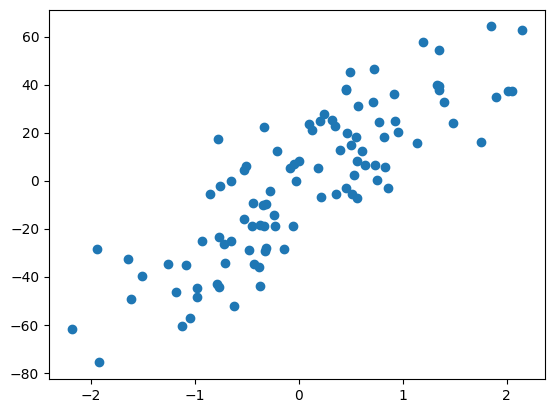

In [4]:
plt.scatter(X,y)

In [5]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train,y_train)
print(reg.coef_)
print(reg.intercept_)

[27.5399754]
-3.082853340654803


intercept values:  -3.082853340654802
coef are:  [27.5399754]
intercept values:  -2.963308562201754
coef are:  [26.42685833]
intercept values:  -2.4851294483895594
coef are:  [21.97439007]
intercept values:  -1.8874055561243166
coef are:  [16.40880474]
intercept values:  -0.1251588104784113
coef are:  [0.]


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.101e+04, tolerance: 7.652e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

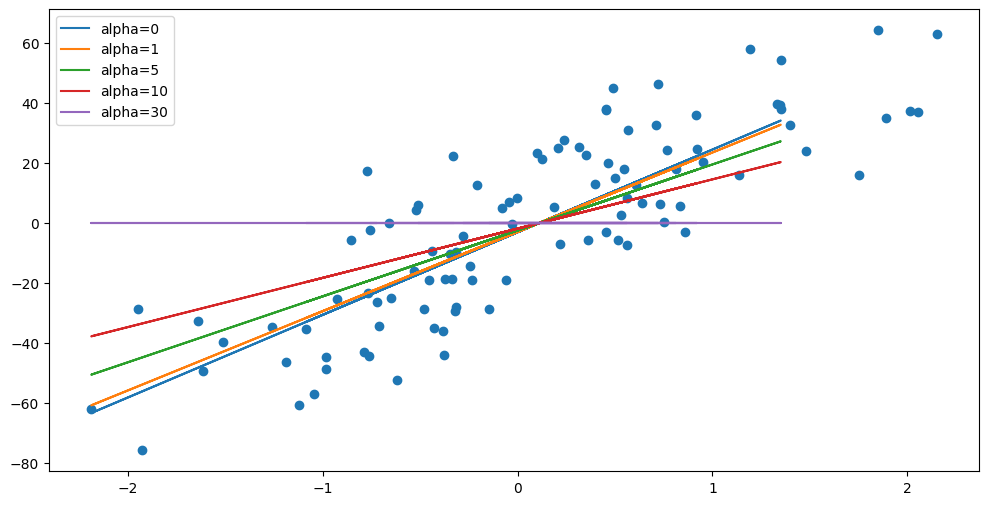

In [6]:
alphas = [0,1,5,10,30]  #here we are trying diff values of lambda; very low lambda value -->simple linear Reg leading to underfitting,; very high lambda value --> lead to overfitting
plt.figure(figsize=(12,6))
plt.scatter(X,y)
for i in alphas:
    L = Lasso(alpha=i)
    L.fit(X_train,y_train)
    plt.plot(X_test,L.predict(X_test),label='alpha={}'.format(i))
    print("intercept values: ", L.intercept_)
    print("coef are: ", L.coef_)
plt.legend()
plt.show()

**Alpha (λ) controls regularization strength:**

Higher α → More shrinkage, fewer features retained.

Lower α → Less shrinkage, behaves like Linear Regression.

##🔹 Key Takeaways
✔ Low α (0-1) → Overfitting risk, minimal coefficient shrinkage.

✔ Moderate α (1-5) → Best balance, retains key features, prevents overfitting.

✔ High α (10-30) → Feature selection occurs, possible underfitting.

✔ Very High α (50+) → Too much shrinkage, model loses predictive power.

👉 Best practice: Use cross-validation to find the optimal alpha for your dataset!